In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<span style="font-size:25px; font-weight: bold;">Step 1: Data Exploration and Preprocessing</span>

In [32]:
df = pd.read_csv("TASK-ML-INTERN.csv")

In [33]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [34]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [36]:
df.shape

(500, 450)

In [37]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [38]:
X = df.iloc[:, 1:-1].values  
y = df['vomitoxin_ppb'].values 
sample_ids = df['hsi_id'].values

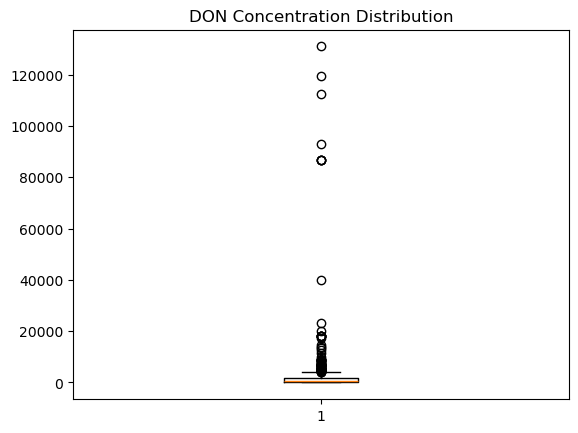

In [39]:
plt.boxplot(y)
plt.title("DON Concentration Distribution")
plt.show()

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

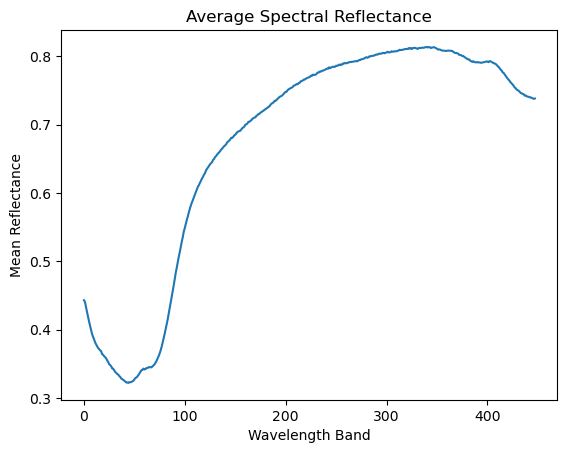

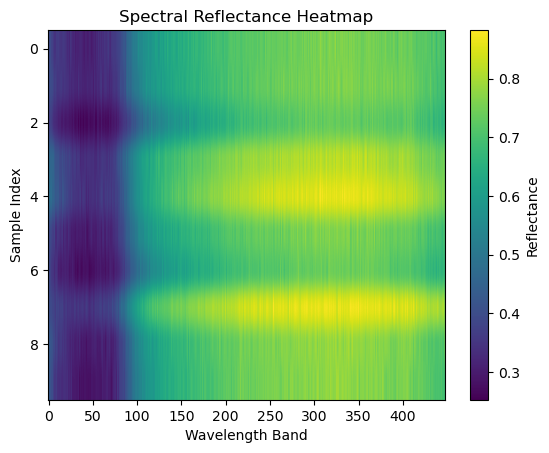

In [41]:
mean_reflectance = np.mean(X, axis=0)
plt.plot(range(448), mean_reflectance)
plt.xlabel("Wavelength Band")
plt.ylabel("Mean Reflectance")
plt.title("Average Spectral Reflectance")
plt.show()

plt.imshow(X[:10], aspect='auto', cmap='viridis')
plt.colorbar(label="Reflectance")
plt.xlabel("Wavelength Band")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap")
plt.show()

<span style="font-size:25px; font-weight: bold;">Step 2: Dimensionality Reduction</span>

Cumulative Variance Explained: [0.87077909 0.92926978 0.95039272 0.96173236 0.96397167 0.96478239
 0.96526731 0.96565847 0.96603037 0.96639401]


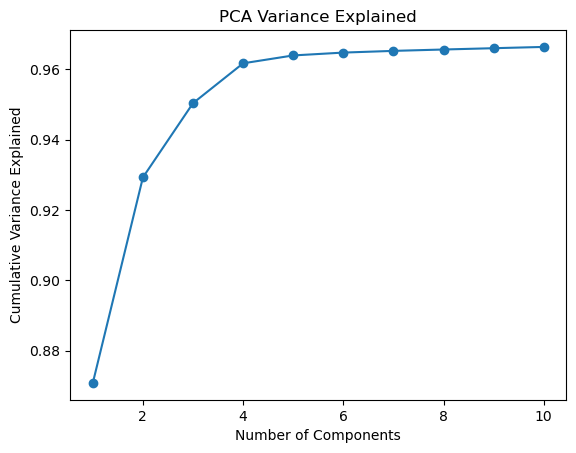

In [42]:
pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)

plt.plot(range(1, 11), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("PCA Variance Explained")
plt.show()

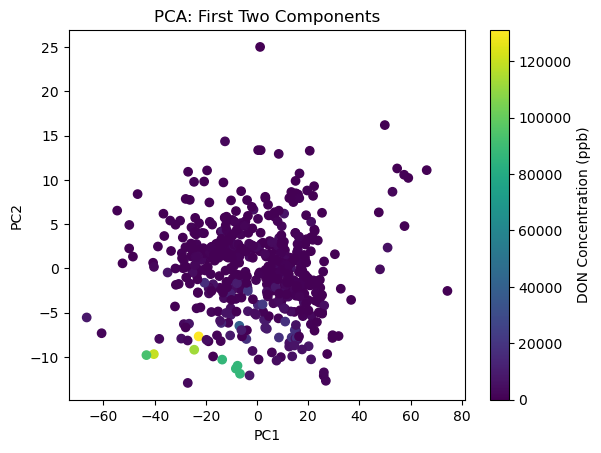

In [43]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label="DON Concentration (ppb)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First Two Components")
plt.show()

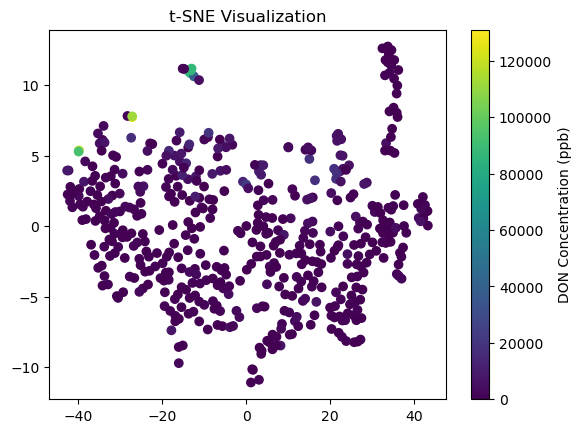

In [44]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label="DON Concentration (ppb)")
plt.title("t-SNE Visualization")
plt.show()

<span style="font-size:25px; font-weight: bold;">Step 3: Model Training</span>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

C:\Users\akaus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 111079936.0000 - mae: 2850.1208 - val_loss: 203202960.0000 - val_mae: 4086.3110
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 48425788.0000 - mae: 2017.4564 - val_loss: 203177248.0000 - val_mae: 4084.4734
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 95906104.0000 - mae: 2765.0120 - val_loss: 203148768.0000 - val_mae: 4082.5073
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 53790500.0000 - mae: 2146.7368 - val_loss: 203119648.0000 - val_mae: 4080.4551
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 206010720.0000 - mae: 3525.7566 - val_loss: 203082528.0000 - val_mae: 4077.9761
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 106760360.0000 - mae: 2597.2307 - val_loss: 203042048.0000 - val_mae: 4075.2104
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 202775312.0000 - mae: 3471.9648 - val_loss: 202989184.0000 - val_mae: 4071.7637
Epoch 8/50
10/10 ━━━━━━━━━━━━━━

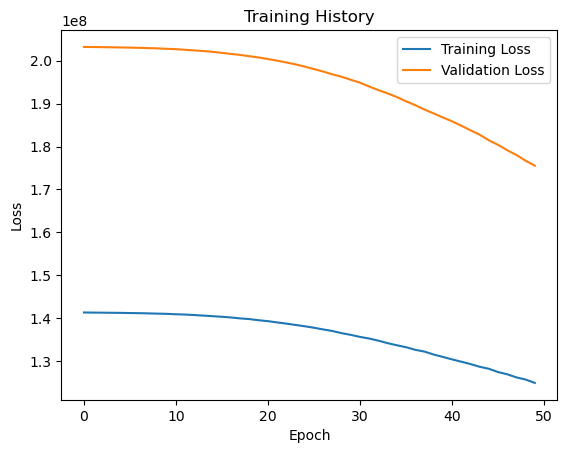

In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training History")
plt.show()

<span style="font-size:25px; font-weight: bold;">Step 4: Model Evaluation</span>

In [47]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} ppb")
print(f"RMSE: {rmse:.2f} ppb")
print(f"R²: {r2:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 4512.02 ppb
RMSE: 16149.83 ppb
R²: 0.07


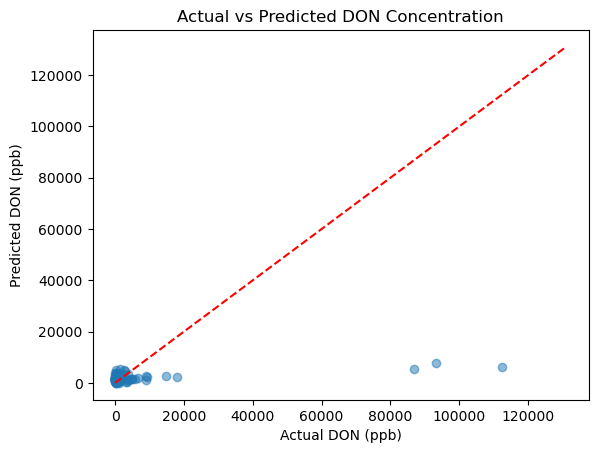

In [48]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual DON (ppb)")
plt.ylabel("Predicted DON (ppb)")
plt.title("Actual vs Predicted DON Concentration")
plt.show()